In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_excel('Appendicitis.xlsx')

In [3]:
#Univariate Analysis
df['Age'].unique()

array([12, 14, 16, 11,  8,  7,  9, 15, 13, 17, 10,  5,  6, 18],
      dtype=int64)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


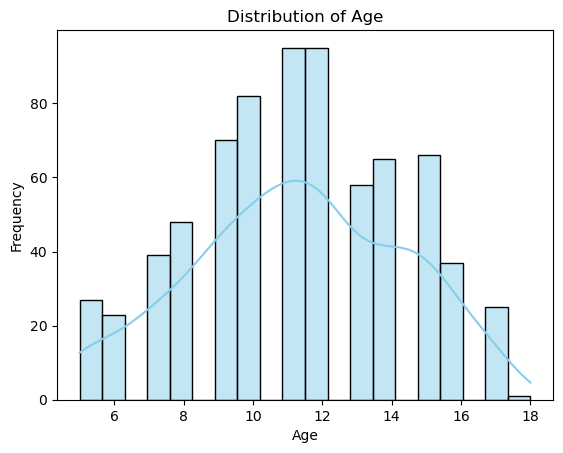

In [4]:
plt.figure()
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

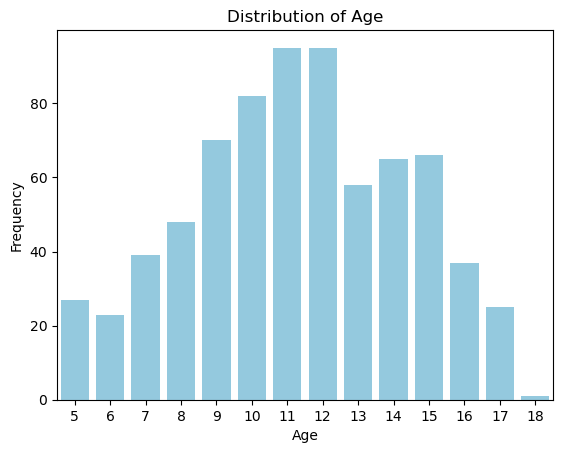

In [12]:
plt.figure()
sns.countplot(x='Age', data=df, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



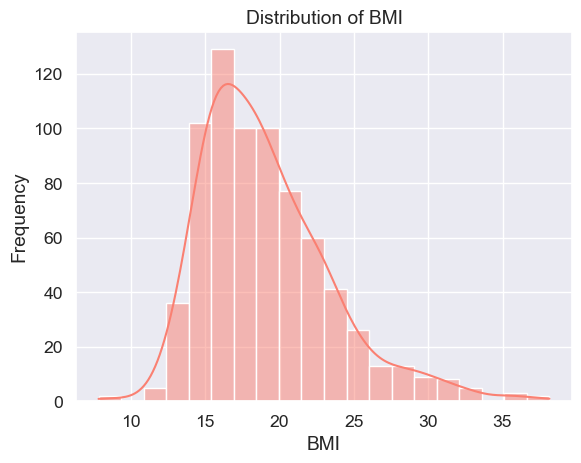

In [34]:
# Distribution of BMI
plt.figure()
sns.histplot(df['BMI'], bins=20, kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

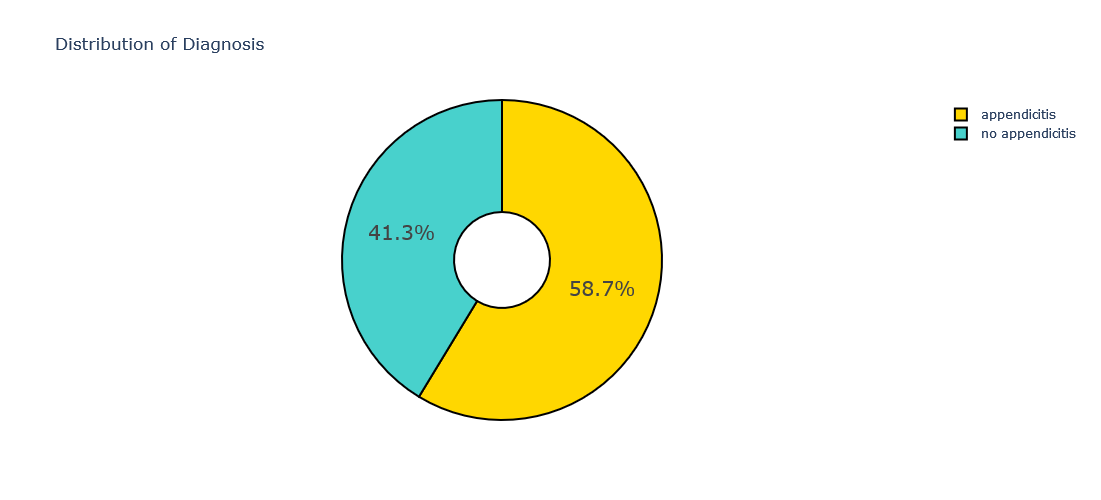

In [35]:
# Get value counts for Diagnosis
import plotly.graph_objects as go
diagnosis_counts = df['Diagnosis'].value_counts()

# Extract labels and values
labels = diagnosis_counts.index.tolist()
values = diagnosis_counts.values.tolist()
colors = ['gold', 'mediumturquoise']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Distribution of Diagnosis",width=500,height=500 )
fig.show()

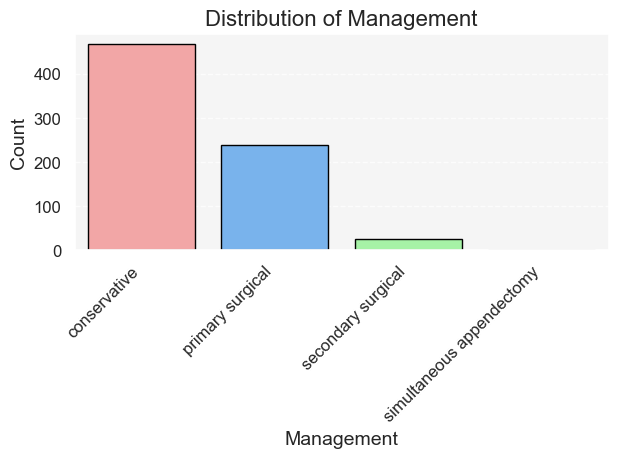

In [36]:
# Set a custom color palette
custom_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# Create the plot
plt.figure()
sns.countplot(x='Management', data=df, palette=custom_palette, edgecolor='black')
# Title and labels
plt.title('Distribution of Management', fontsize=16)
plt.xlabel('Management', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
# Adjust y-axis label size
plt.yticks(fontsize=12)
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add a background color to the plot
plt.gca().set_facecolor('#f5f5f5')
# Tight layout
plt.tight_layout()
# Show plot
plt.show()


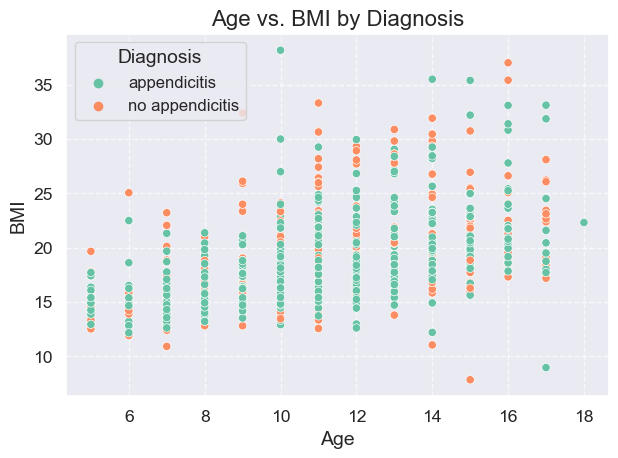

In [37]:
# Scatter plot for Age vs. BMI
custom_palette = 'Set2'

# Create the scatter plot
plt.figure()
sns.scatterplot(x='Age', y='BMI', data=df, hue='Diagnosis', palette=custom_palette)
plt.title('Age vs. BMI by Diagnosis', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='Diagnosis', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5900\2508261296.py:4: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



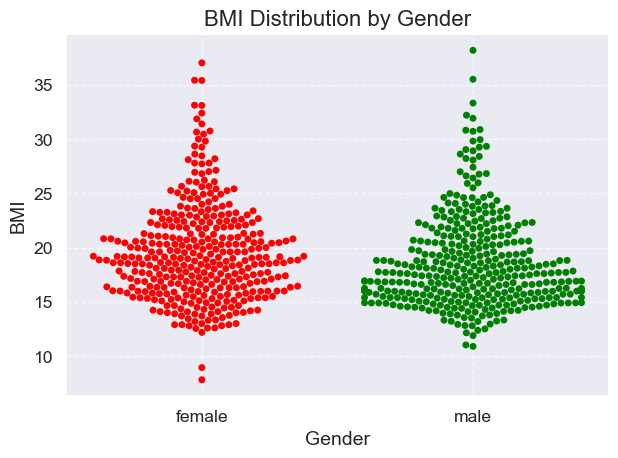

In [38]:
# Set up the figure and axis
plt.figure()
# Plot the swarm plot
sns.swarmplot(x='Sex', y='BMI', data=df, palette={'male': 'green', 'female': 'red'})

# Add title and labels
plt.title('BMI Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('BMI', fontsize=14)

# Show plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


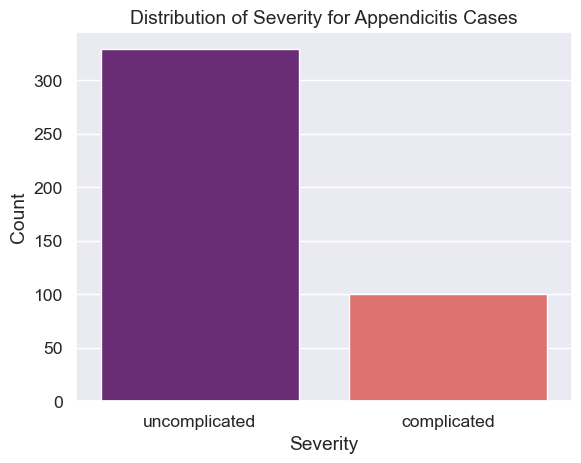

In [39]:
# Filter the DataFrame for cases where Diagnosis is 'appendicitis'
appendicitis_data = df[df['Diagnosis'] == 'appendicitis']

# Count plot for Severity in cases of appendicitis
plt.figure()
sns.countplot(x='Severity', data=appendicitis_data, palette='magma')
plt.title('Distribution of Severity for Appendicitis Cases')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

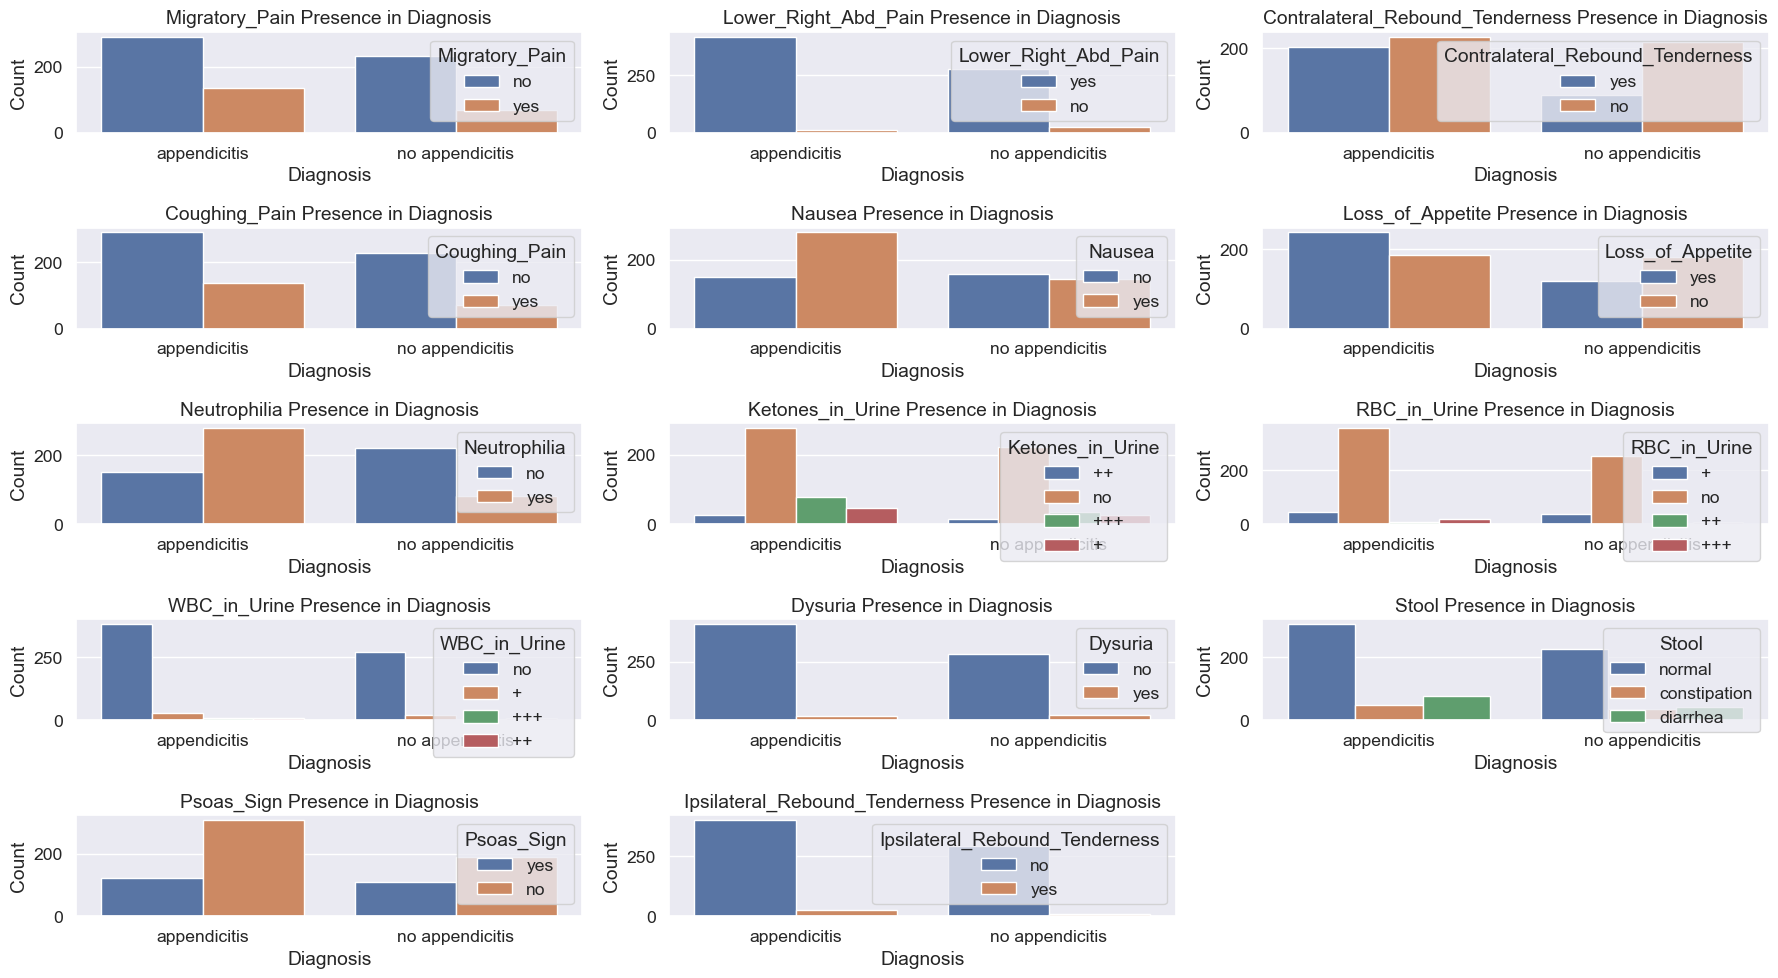

In [40]:
def plot_diagnosis_vs_symptoms(df, symptoms_columns):
    # Set the size of the plots
    plt.figure(figsize=(18, 10))
    # Total number of symptom columns
    total_columns = len(symptoms_columns)
    # Define number of rows and columns for subplot
    n_rows = total_columns // 3 + (total_columns % 3 > 0)
    n_cols = 3
    for index, symptom in enumerate(symptoms_columns, 1):
        plt.subplot(n_rows, n_cols, index)
        sns.countplot(x='Diagnosis', hue=symptom, data=df)
        plt.title(f'{symptom} Presence in Diagnosis')
        plt.xlabel('Diagnosis')
        plt.ylabel('Count')
        plt.legend(title=symptom, loc='upper right')
        # Adjust subplot params for better layout
        plt.tight_layout()

# List of symptom columns
symptoms_columns = ['Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 
                    'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 
                    'RBC_in_Urine', 'WBC_in_Urine', 'Dysuria', 'Stool', 'Psoas_Sign', 
                    'Ipsilateral_Rebound_Tenderness']

# Call the function with the DataFrame and the list of symptom columns
plot_diagnosis_vs_symptoms(df, symptoms_columns)

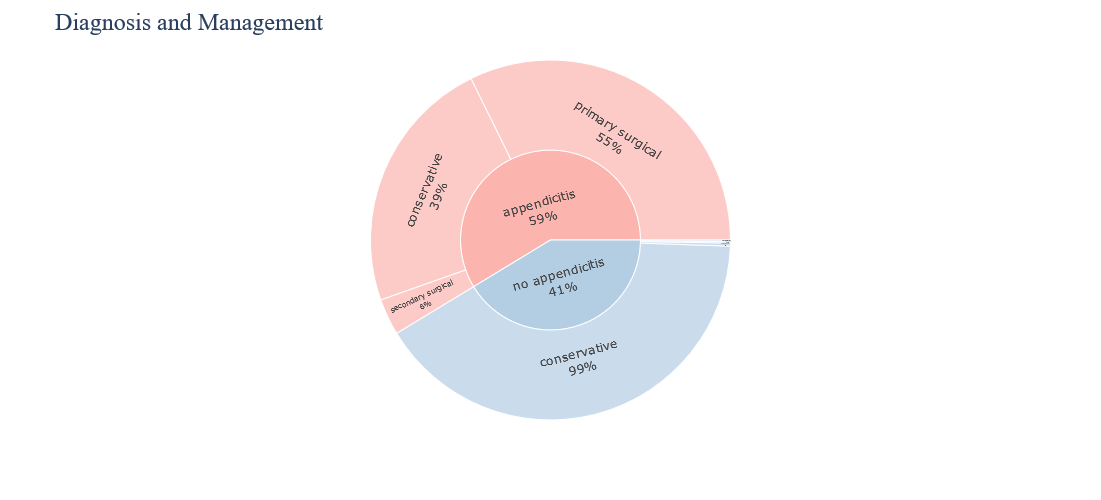

In [41]:
import plotly.express as px
fig = px.sunburst(df, path=['Diagnosis', 'Management'],color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Diagnosis and Management", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=500, 
                  height=500)
fig.show()

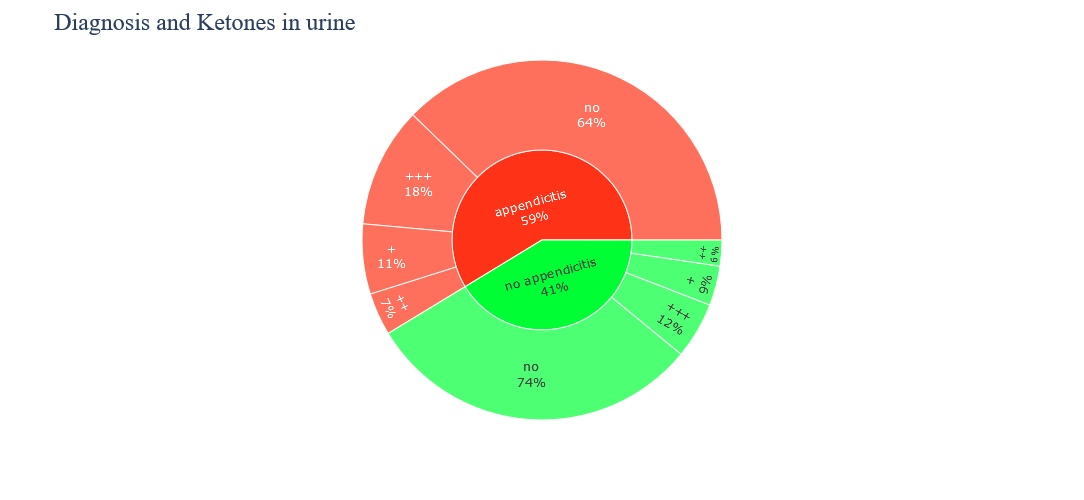

In [42]:
import plotly.express as px
fig = px.sunburst(df, path=['Diagnosis', 'Ketones_in_Urine'],color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Diagnosis and Ketones in urine", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=500, 
                  height=500)
fig.show()

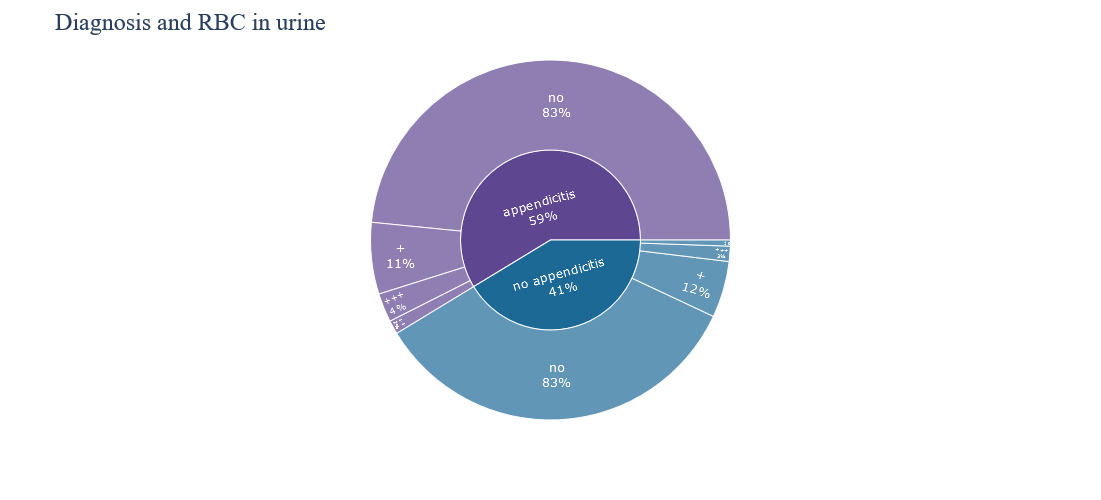

In [43]:
import plotly.express as px
fig = px.sunburst(df, path=['Diagnosis', 'RBC_in_Urine'],color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Diagnosis and RBC in urine", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=500, 
                  height=500)
fig.show()

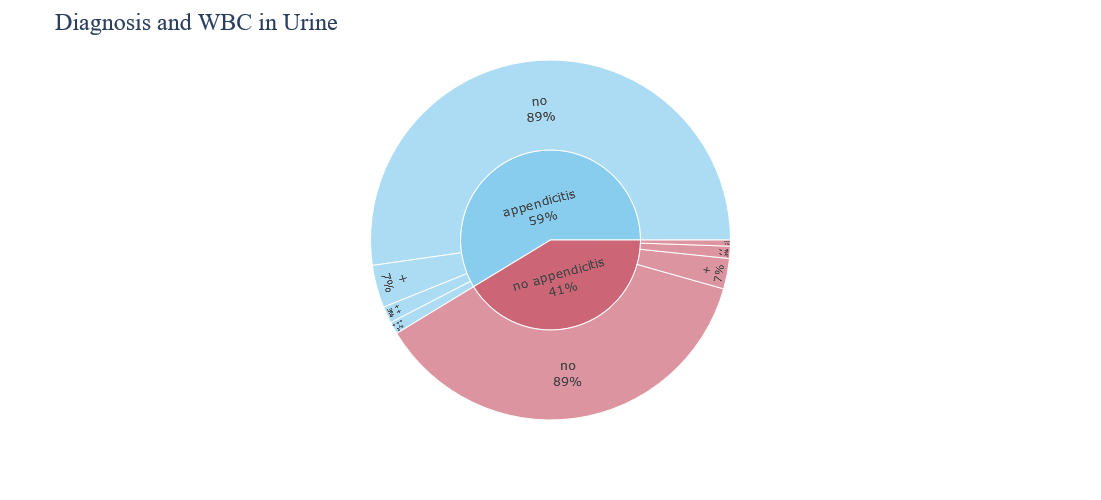

In [44]:
import plotly.express as px
fig = px.sunburst(df, path=['Diagnosis', 'WBC_in_Urine'],color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Diagnosis and WBC in Urine", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=500, 
                  height=500)
fig.show()

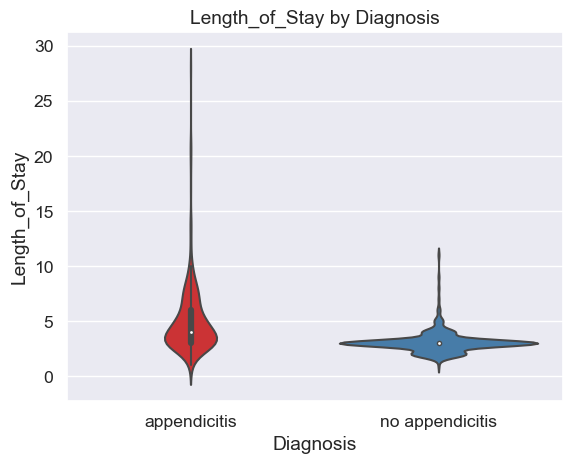

In [45]:
# Violin plot for Length_of_Stay by Diagnosis
plt.figure()
sns.violinplot(x='Diagnosis', y='Length_of_Stay', data=df, palette='Set1')
plt.title('Length_of_Stay by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Length_of_Stay')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

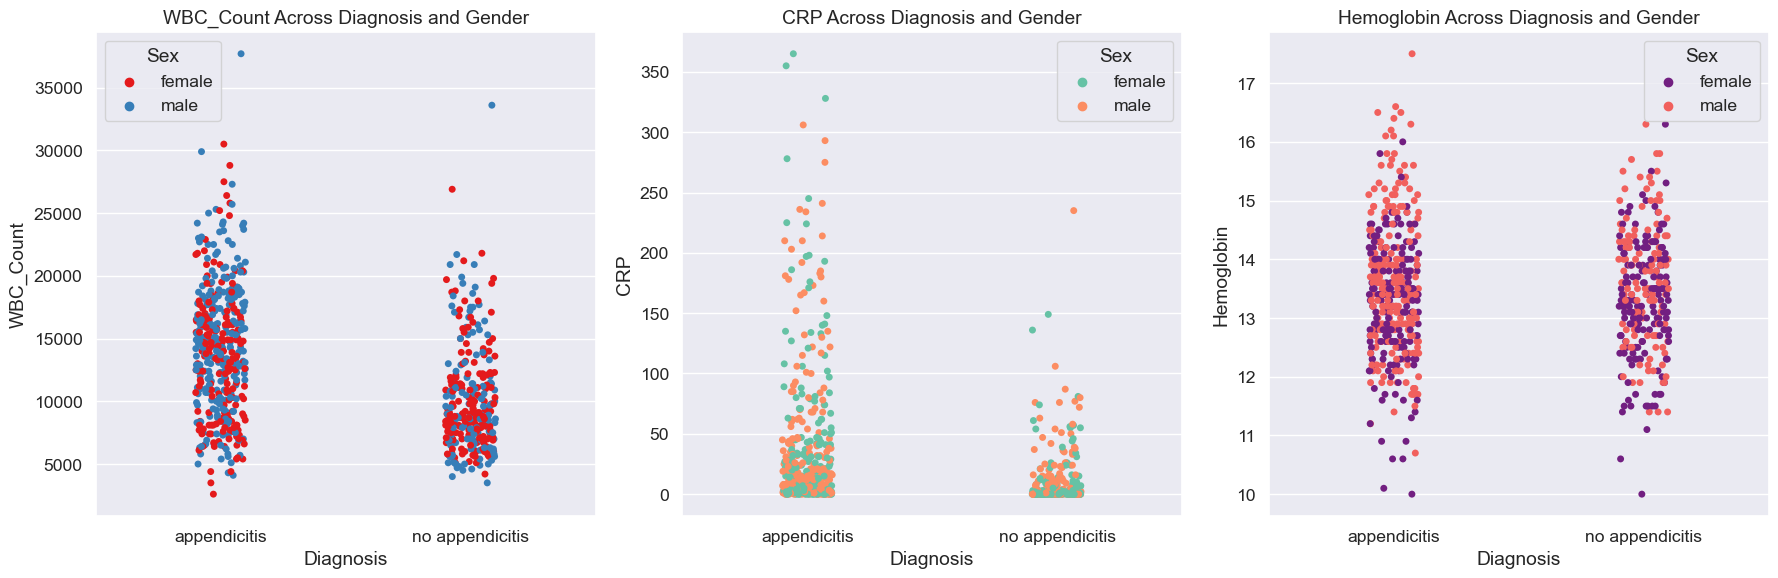

In [46]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Strip plot for WBC_Count
sns.stripplot(x="Diagnosis", y="WBC_Count", hue="Sex", data=df, jitter=True, ax=axes[0],palette='Set1')
axes[0].set_title('WBC_Count Across Diagnosis and Gender')
axes[0].set_ylabel('WBC_Count')

# Strip plot for CRP
sns.stripplot(x="Diagnosis", y="CRP", hue="Sex", data=df, jitter=True, ax=axes[1],palette='Set2')
axes[1].set_title('CRP Across Diagnosis and Gender')
axes[1].set_ylabel('CRP')

# Strip plot for Hemoglobin
sns.stripplot(x="Diagnosis", y="Hemoglobin", hue="Sex", data=df, jitter=True, ax=axes[2],palette='magma')
axes[2].set_title('Hemoglobin Across Diagnosis and Gender')
axes[2].set_ylabel('Hemoglobin')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

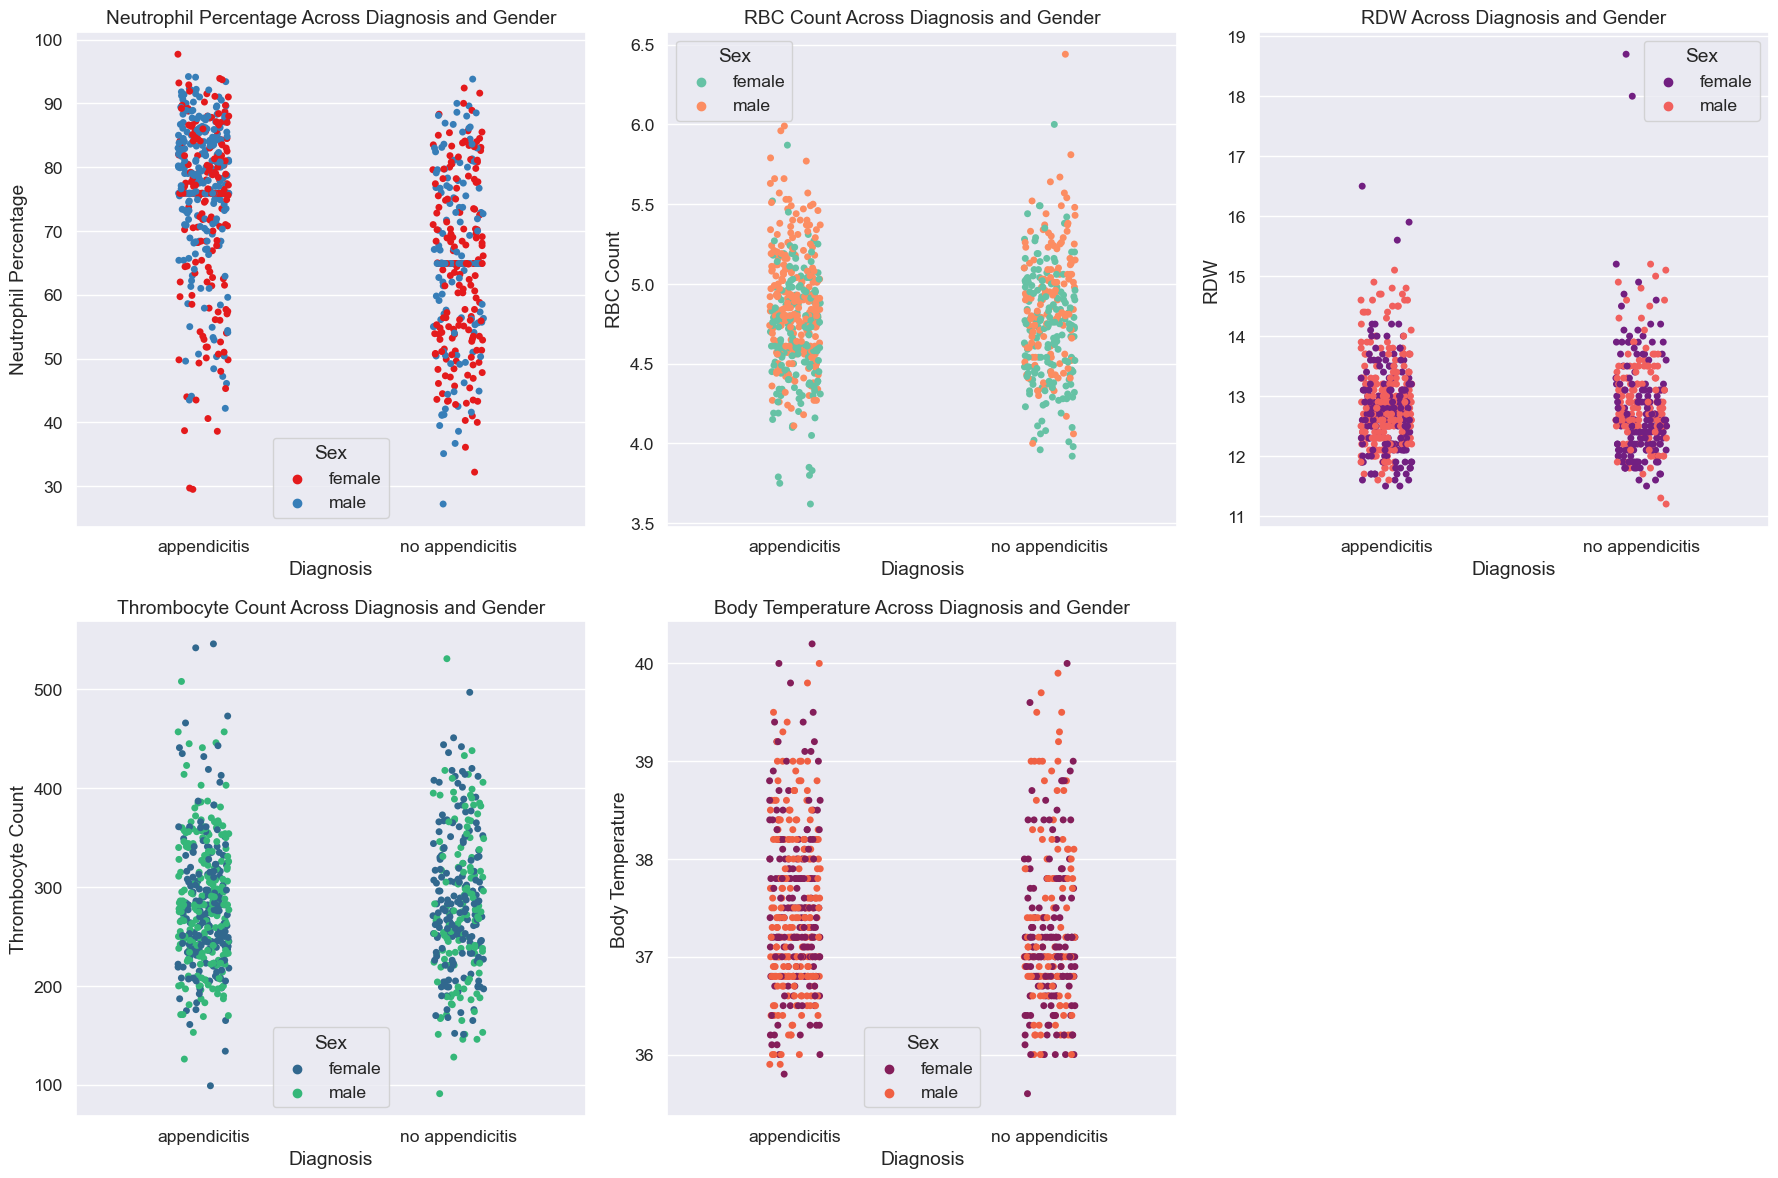

In [47]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
# Strip plot for Neutrophil Percentage
sns.stripplot(x="Diagnosis", y="Neutrophil_Percentage", hue="Sex", data=df, jitter=True, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Neutrophil Percentage Across Diagnosis and Gender')
axes[0, 0].set_ylabel('Neutrophil Percentage')
# Strip plot for RBC Count
sns.stripplot(x="Diagnosis", y="RBC_Count", hue="Sex", data=df, jitter=True, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('RBC Count Across Diagnosis and Gender')
axes[0, 1].set_ylabel('RBC Count')
# Strip plot for RDW
sns.stripplot(x="Diagnosis", y="RDW", hue="Sex", data=df, jitter=True, ax=axes[0, 2], palette='magma')
axes[0, 2].set_title('RDW Across Diagnosis and Gender')
axes[0, 2].set_ylabel('RDW')
# Strip plot for Thrombocyte Count
sns.stripplot(x="Diagnosis", y="Thrombocyte_Count", hue="Sex", data=df, jitter=True, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Thrombocyte Count Across Diagnosis and Gender')
axes[1, 0].set_ylabel('Thrombocyte Count')
# Strip plot for Body Temperature
sns.stripplot(x="Diagnosis", y="Body_Temperature", hue="Sex", data=df, jitter=True, ax=axes[1, 1], palette='rocket')
axes[1, 1].set_title('Body Temperature Across Diagnosis and Gender')
axes[1, 1].set_ylabel('Body Temperature')
# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


Basic statistics for Alvarado Score:
count    731.000000
mean       5.867305
std        2.182159
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Alvarado_Score, dtype: float64

Basic statistics for Paediatric Appendicitis Score:
count    731.000000
mean       5.240766
std        1.981982
min        0.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Paedriatic_Appendicitis_Score, dtype: float64


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



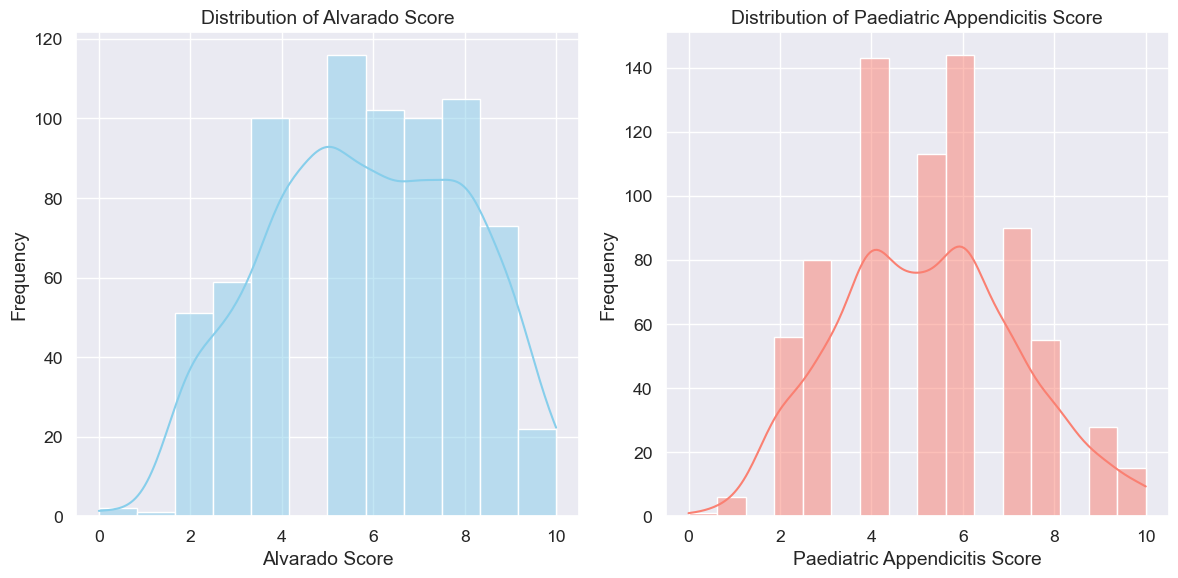

In [48]:
# Basic statistics for Alvarado Score and Paediatric Score
alvarado_stats = df['Alvarado_Score'].describe()
paediatric_stats = df['Paedriatic_Appendicitis_Score'].describe()

print("Basic statistics for Alvarado Score:")
print(alvarado_stats)
print("\nBasic statistics for Paediatric Appendicitis Score:")
print(paediatric_stats)

# Visualize distributions using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Alvarado_Score'], kde=True, color='skyblue')
plt.title('Distribution of Alvarado Score')
plt.xlabel('Alvarado Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Paedriatic_Appendicitis_Score'], kde=True, color='salmon')
plt.title('Distribution of Paediatric Appendicitis Score')
plt.xlabel('Paediatric Appendicitis Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

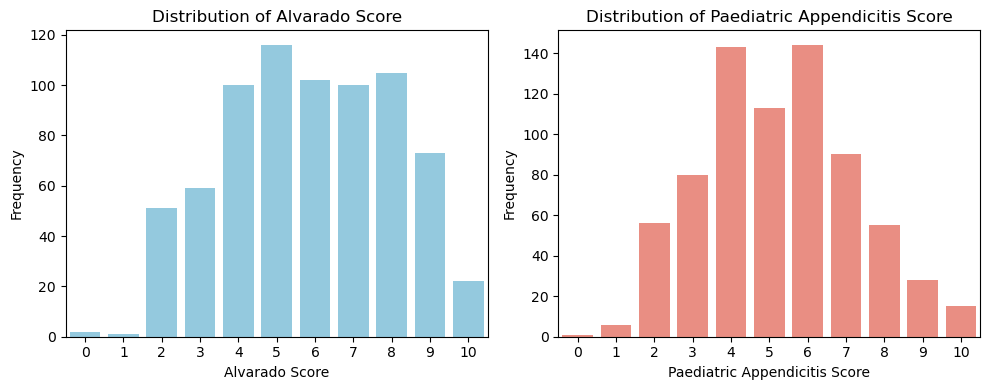

In [15]:
# Visualize distributions using histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Alvarado_Score', data=df, color='skyblue')
plt.title('Distribution of Alvarado Score')
plt.xlabel('Alvarado Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Paedriatic_Appendicitis_Score', data=df, color='salmon')
plt.title('Distribution of Paediatric Appendicitis Score')
plt.xlabel('Paediatric Appendicitis Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [49]:
# Columns to be label encoded
columns_to_encode = ['Sex', 'Management', 'Severity', 'Diagnosis_Presumptive','Diagnosis',
                     'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 
                     'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 
                     'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Dysuria', 
                     'Stool', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness']

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each column
for col in columns_to_encode:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
# Display the transformed DataFrame
print("Encoded DataFrame:")
print(df)

Encoded DataFrame:
     Age        BMI  Sex  Height  Weight  Length_of_Stay  Management  \
0     12  16.900000    0     148    37.0               3           0   
1     14  31.900000    1     147    69.5               2           0   
2     14  23.300000    0     163    62.0               4           0   
3     16  20.600000    0     165    56.0               3           0   
4     11  16.900000    0     163    45.0               3           0   
..   ...        ...  ...     ...     ...             ...         ...   
726   12  25.250476    0     166    70.0               4           1   
727   17  20.429418    0     158    51.0               6           2   
728   14  19.909972    0     152    46.0               4           1   
729    7  14.295549    1     129    23.9               5           1   
730   11  18.171441    1     146    39.0               4           1   

     Severity  Diagnosis_Presumptive  Diagnosis  ...   RDW  Thrombocyte_Count  \
0           1                     1

In [50]:
# Print mappings for each column
for col, encoder in label_encoders.items():
    print(f"\nMappings for column '{col}':")
    for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{encoded_label} = {label}")


Mappings for column 'Sex':
0 = female
1 = male

Mappings for column 'Management':
0 = conservative
1 = primary surgical
2 = secondary surgical
3 = simultaneous appendectomy

Mappings for column 'Severity':
0 = complicated
1 = uncomplicated

Mappings for column 'Diagnosis_Presumptive':
0 = Abdominal adhesions, chron.Underponing complaints with sub -phymptomatic
1 = Adhäsionen des colon ascending
2 = Appendizitis, lymphadenitis mesenterialis
3 = Bridenileus
4 = Chronic abdominal pain
5 = Chronic appendicitis
6 = Gastroenteritis
7 = Ovarialtorsion
8 = Sepsis with accompanying stagicitis
9 = Torsion of the adnexe
10 = appendicitis
11 = no appendicitis

Mappings for column 'Diagnosis':
0 = appendicitis
1 = no appendicitis

Mappings for column 'Migratory_Pain':
0 = no
1 = yes

Mappings for column 'Lower_Right_Abd_Pain':
0 = no
1 = yes

Mappings for column 'Contralateral_Rebound_Tenderness':
0 = no
1 = yes

Mappings for column 'Coughing_Pain':
0 = no
1 = yes

Mappings for column 'Nausea':
0 

In [51]:
df.to_excel('Appendicitis1.xlsx', index=False)

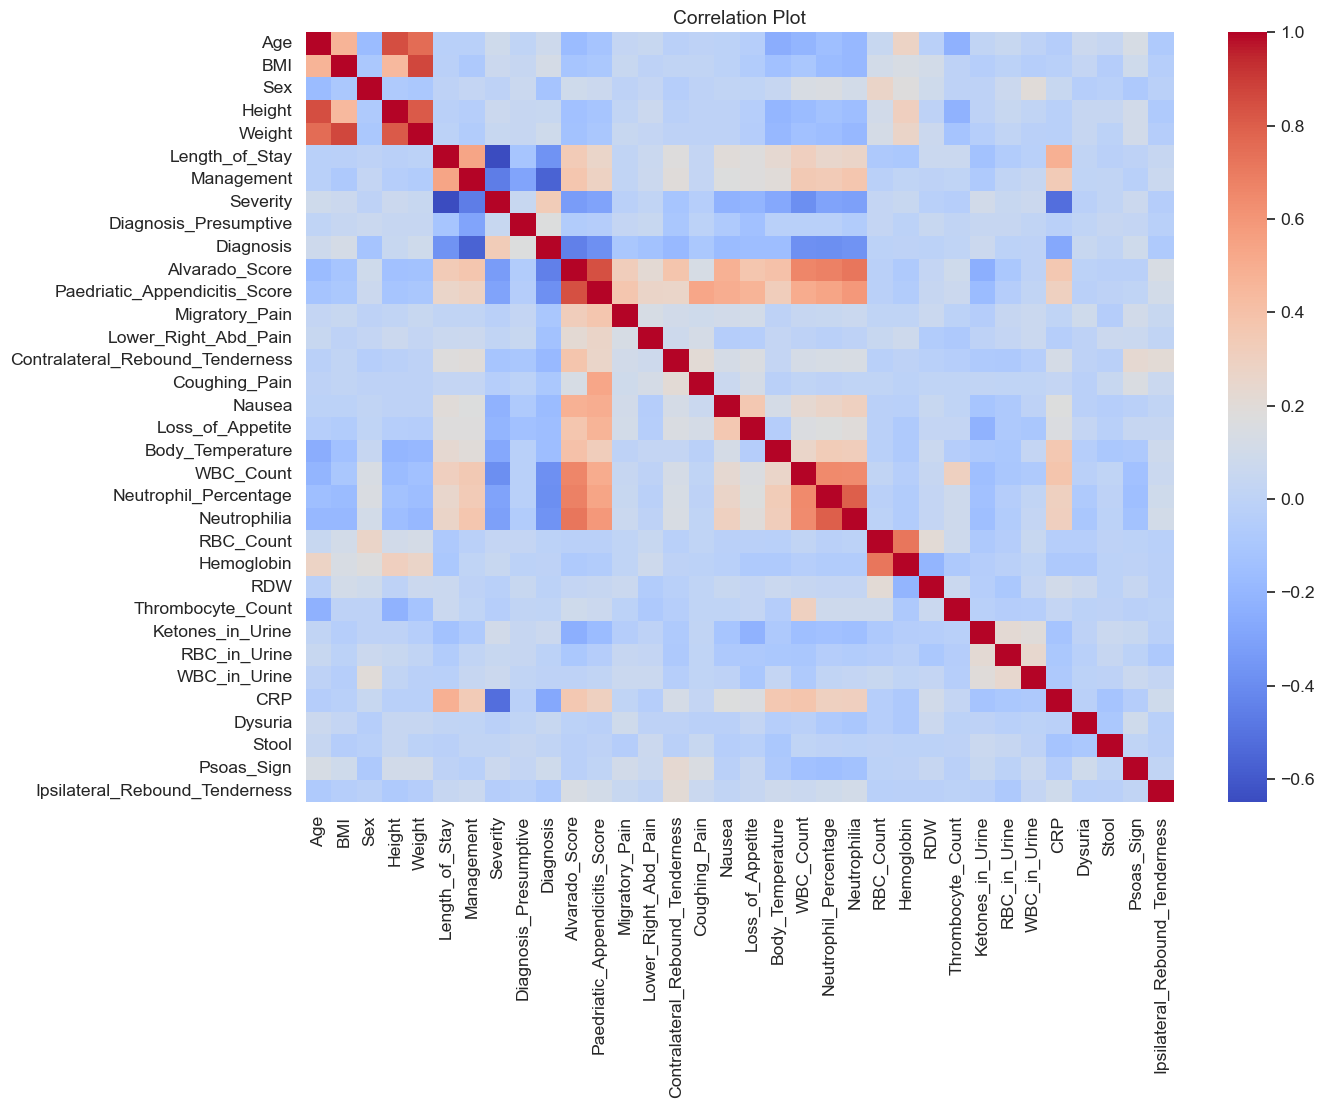

In [52]:
# Calculate correlation matrix
corr = df.corr().round(2)

# Set plot aesthetics
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

# Plot correlation heatmap
sns.heatmap(corr, cmap='coolwarm')

plt.title('Correlation Plot')

# Show plot
plt.show()